In [ ]:
import pandas as pd
import glob
import numpy as np
import re

In [ ]:
df_files=pd.read_csv("/content/drive/MyDrive/Enhanced_ML_Framework/final/OTU_CRC_4168_final.tsv",sep="\t")
df_files

,name,ERR1018185,ERR1018186,ERR1018187,ERR1018188,ERR1018189,ERR1018190,ERR1018191,ERR1018192,ERR1018193,...,SRR8865592,SRR8865593,SRR8865594,SRR8865595,SRR8865596,SRR8865597,SRR8865598,SRR8865599,SRR8865600,SRR8865601
0,MGYG000003389,0,0,0,10,22,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fibrobacter_A_intestinalis,52,0,10,13,41,0,0,0,35,...,0,0,0,0,0,0,0,0,0,0
2,UBA4248_sp004554395,64,42,15,0,76,0,0,12,33,...,0,0,0,0,0,0,10,0,0,0
3,MGYG000003670,0,0,0,24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bruticola_sp004554425,77,684,13,240,184,0,0,318,43,...,0,0,0,25,0,0,45,0,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4597,CAG-83_sp900547745,95637,2756,2717,2299,12152,1573,244,166,762,...,233,1847,331,15,0,2320,1067,32,2636,58
4598,CAG-83_sp000431575,133941,310679,13939,555676,86503,304452,2920,37209,61607,...,1175,2537,45,38,21,1219,645,439,773,654
4599,CAG-83_sp003539495,157833,2709,122592,10902,5796,1173,710,282,30551,...,18562,1743,130,0,0,1572,4464,20,14572,236
4600,CAG-83_sp000435555,166900,3796,9058,11143,11613,2727,1275,407,1276,...,1744,73094,498,21,0,73394,3854,71,9491,291


In [ ]:
df_out=pd.read_csv("/content/drive/MyDrive/Enhanced_ML_Framework/final/OTU_CRC_4168_final.tsv",sep="\t")
df_out.index=df_out["name"].values
df_out=df_out.drop(columns="name")

df_out

,ERR1018185,ERR1018186,ERR1018187,ERR1018188,ERR1018189,ERR1018190,ERR1018191,ERR1018192,ERR1018193,ERR1018194,...,SRR8865592,SRR8865593,SRR8865594,SRR8865595,SRR8865596,SRR8865597,SRR8865598,SRR8865599,SRR8865600,SRR8865601
MGYG000003389,0,0,0,10,22,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fibrobacter_A_intestinalis,52,0,10,13,41,0,0,0,35,0,...,0,0,0,0,0,0,0,0,0,0
UBA4248_sp004554395,64,42,15,0,76,0,0,12,33,0,...,0,0,0,0,0,0,10,0,0,0
MGYG000003670,0,0,0,24,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bruticola_sp004554425,77,684,13,240,184,0,0,318,43,41,...,0,0,0,25,0,0,45,0,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAG-83_sp900547745,95637,2756,2717,2299,12152,1573,244,166,762,181,...,233,1847,331,15,0,2320,1067,32,2636,58
CAG-83_sp000431575,133941,310679,13939,555676,86503,304452,2920,37209,61607,17855,...,1175,2537,45,38,21,1219,645,439,773,654
CAG-83_sp003539495,157833,2709,122592,10902,5796,1173,710,282,30551,152,...,18562,1743,130,0,0,1572,4464,20,14572,236
CAG-83_sp000435555,166900,3796,9058,11143,11613,2727,1275,407,1276,477,...,1744,73094,498,21,0,73394,3854,71,9491,291


In [ ]:
import pandas as pd
import numpy as np

# Assuming your dataframe is df_filtered (species x samples)

# Step 1: Add pseudocount to avoid log(0)
df_pseudo = df_out + 1

# Step 2: Compute geometric mean for each species (row)
# CLR is log(value / geometric mean of row)
geometric_mean = np.exp(np.log(df_pseudo).mean(axis=1))  # row-wise geometric mean

# Step 3: Apply CLR transformation
df_clr = np.log(df_pseudo.div(geometric_mean, axis=0))

print("CLR-transformed table:")
print(df_clr)

CLR-transformed table:
                            ERR1018185  ERR1018186  ERR1018187  ERR1018188  \
MGYG000003389                -0.485926   -0.485926   -0.485926    1.911969   
Fibrobacter_A_intestinalis    2.970697   -0.999595    1.398300    1.639462   
UBA4248_sp004554395           2.224797    1.811610    0.822998   -1.949591   
MGYG000003670                -0.110979   -0.110979   -0.110979    3.107897   
Bruticola_sp004554425         1.181023    3.353733   -0.536628    2.309111   
...                                ...         ...         ...         ...   
CAG-83_sp900547745            5.229000    1.682573    1.668327    1.501339   
CAG-83_sp000431575            3.760282    4.601638    1.497637    5.183062   
CAG-83_sp003539495            5.473943    1.409348    5.221269    2.801437   
CAG-83_sp000435555            4.171130    0.387940    1.257488    1.464630   
CAG-83_sp900545495            5.618029    1.725002    2.087937    1.200250   

                            ERR1018189  

In [ ]:
clr_df=df_clr.T
clr_df

,MGYG000003389,Fibrobacter_A_intestinalis,UBA4248_sp004554395,MGYG000003670,Bruticola_sp004554425,Bruticola_sp900772775,MGYG000002669,CADBRU01_sp900762815,MGYG000001768,UBA1436_sp900540405,...,CAG-83_sp900545585,CAG-83_sp900554275,CAG-83_sp001916855,CAG-83_sp900552475,CAG-83_sp900548615,CAG-83_sp900547745,CAG-83_sp000431575,CAG-83_sp003539495,CAG-83_sp000435555,CAG-83_sp900545495
ERR1018185,-0.485926,2.970697,2.224797,-0.110979,1.181023,2.626711,3.362019,-0.140803,-0.241548,-0.121384,...,3.139025,3.399533,3.513887,4.852660,4.127933,5.229000,3.760282,5.473943,4.171130,5.618029
ERR1018186,-0.485926,-0.999595,1.811610,-0.110979,3.353733,1.945834,1.868094,-0.140803,-0.241548,-0.121384,...,1.719870,2.689879,2.150376,4.555451,1.383364,1.682573,4.601638,1.409348,0.387940,1.725002
ERR1018187,-0.485926,1.398300,0.822998,-0.110979,-0.536628,2.614288,1.868094,-0.140803,-0.241548,-0.121384,...,2.116820,2.426597,4.508475,3.120021,1.596582,1.668327,1.497637,5.221269,1.257488,2.087937
ERR1018188,1.911969,1.639462,-1.949591,3.107897,2.309111,3.397048,-1.222948,-0.140803,-0.241548,-0.121384,...,1.277550,1.338559,1.200611,1.756311,0.944391,1.501339,5.183062,2.801437,1.464630,1.200250
ERR1018189,2.649568,2.738074,2.394215,-0.110979,2.044670,2.638981,4.919089,-0.140803,-0.241548,-0.121384,...,2.368778,2.719842,2.132075,2.265523,2.286644,3.166006,3.323066,2.169740,1.505940,2.602414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR8865597,-0.485926,-0.999595,-1.949591,-0.110979,-3.175685,2.562995,1.261959,-0.140803,-0.241548,-0.121384,...,0.049397,0.874133,3.028962,0.151377,1.071177,1.510428,-0.938274,0.865384,3.349585,1.314536
SRR8865598,-0.485926,-0.999595,0.448305,-0.110979,0.652956,-1.767738,3.800933,2.257092,-0.241548,5.598928,...,0.399758,1.063760,-0.696836,-0.284233,1.170965,0.734218,-1.574081,1.908668,0.403100,0.751926
SRR8865599,-0.485926,-0.999595,-1.949591,-0.110979,-3.175685,-1.767738,-1.222948,-0.140803,-0.241548,-0.121384,...,-2.728646,-2.059674,-3.137007,-2.569597,-1.745796,-2.742817,-1.958106,-3.450834,-3.577360,-3.371018
SRR8865600,-0.485926,-0.999595,-1.949591,-0.110979,0.951449,-1.767738,-1.222948,-0.140803,-0.241548,6.779347,...,1.353752,1.338559,0.025828,0.574345,2.221359,1.638072,-1.393309,3.091569,1.304178,1.606481


In [ ]:
meta_df=pd.read_csv("/content/drive/MyDrive/Enhanced_ML_Framework/final/meadata_crc_final.tsv",sep="\t")
meta_df['Health_status'] = meta_df['Health_status'].str.strip()

meta_df['class_label'] = meta_df['Health_status'].apply(lambda x: 1 if x == 'Healthy' else 0)


meta_df

,Run_ID,BioProject,BioSample,Health_status,Phenotype,Full_Name,Sex,Age,Location,Platform,BMI,CRC stage,class_label
0,SRR30861073,PRJNA1167935,SAMN44019356,Non-Healthy,CRC,Colorectal Cancer,FEMALE,75.0,Turkey,ILLUMINA,NaN,II,0
1,SRR30861074,PRJNA1167935,SAMN44019355,Non-Healthy,CRC,Colorectal Cancer,MALE,55.0,Turkey,ILLUMINA,NaN,IV,0
2,SRR30861075,PRJNA1167935,SAMN44019379,Healthy,Healthy,Healthy,MALE,64.0,Turkey,ILLUMINA,NaN,NaN,1
3,SRR30861076,PRJNA1167935,SAMN44019377,Healthy,Healthy,Healthy,FEMALE,46.0,Turkey,ILLUMINA,NaN,NaN,1
4,SRR30861077,PRJNA1167935,SAMN44019374,Healthy,Healthy,Healthy,MALE,52.0,Turkey,ILLUMINA,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4896,ERR1018308,PRJEB10878,SAMEA3541592,Healthy,Healthy,Healthy,MALE,61.0,China,Illumina HiSeq 2000 platform,23.8,NaN,1
4897,ERR1018309,PRJEB10878,SAMEA3541593,Healthy,Healthy,Healthy,MALE,62.0,China,Illumina HiSeq 2000 platform,21.5,NaN,1
4898,ERR1018310,PRJEB10878,SAMEA3541594,Non-healthy,CRC,Colorectal Cancer,MALE,68.0,China,Illumina HiSeq 2000 platform,23.7,NaN,0
4899,ERR1018311,PRJEB10878,SAMEA3541595,Non-healthy,CRC,Colorectal Cancer,MALE,55.0,China,Illumina HiSeq 2000 platform,25.8,NaN,0


In [ ]:
merge_df=pd.merge(clr_df,meta_df, left_index=True,right_on="Run_ID")
merge_df

,MGYG000003389,Fibrobacter_A_intestinalis,UBA4248_sp004554395,MGYG000003670,Bruticola_sp004554425,Bruticola_sp900772775,MGYG000002669,CADBRU01_sp900762815,MGYG000001768,UBA1436_sp900540405,...,Health_status,Phenotype,Full_Name,Sex,Age,Location,Platform,BMI,CRC stage,class_label
4773,-0.485926,2.970697,2.224797,-0.110979,1.181023,2.626711,3.362019,-0.140803,-0.241548,-0.121384,...,Non-healthy,CRC,Colorectal Cancer,MALE,64.0,China,Illumina HiSeq 2000 platform,23.1,NaN,0
4774,-0.485926,-0.999595,1.811610,-0.110979,3.353733,1.945834,1.868094,-0.140803,-0.241548,-0.121384,...,Non-healthy,CRC,Colorectal Cancer,MALE,73.0,China,Illumina HiSeq 2000 platform,23.8,NaN,0
4775,-0.485926,1.398300,0.822998,-0.110979,-0.536628,2.614288,1.868094,-0.140803,-0.241548,-0.121384,...,Non-healthy,CRC,Colorectal Cancer,FEMALE,67.0,China,Illumina HiSeq 2000 platform,24.7,NaN,0
4776,1.911969,1.639462,-1.949591,3.107897,2.309111,3.397048,-1.222948,-0.140803,-0.241548,-0.121384,...,Non-healthy,CRC,Colorectal Cancer,MALE,56.0,China,Illumina HiSeq 2000 platform,25.6,NaN,0
4777,2.649568,2.738074,2.394215,-0.110979,2.044670,2.638981,4.919089,-0.140803,-0.241548,-0.121384,...,Non-healthy,CRC,Colorectal Cancer,FEMALE,59.0,China,Illumina HiSeq 2000 platform,20.7,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,-0.485926,-0.999595,-1.949591,-0.110979,-3.175685,2.562995,1.261959,-0.140803,-0.241548,-0.121384,...,Non-Healthy,CRC,Colorectal Cancer,MALE,55.0,India,ILLUMINA,19.1,III,0
630,-0.485926,-0.999595,0.448305,-0.110979,0.652956,-1.767738,3.800933,2.257092,-0.241548,5.598928,...,Non-Healthy,CRC,Colorectal Cancer,MALE,62.0,India,ILLUMINA,20.1,I,0
631,-0.485926,-0.999595,-1.949591,-0.110979,-3.175685,-1.767738,-1.222948,-0.140803,-0.241548,-0.121384,...,Non-Healthy,CRC,Colorectal Cancer,FEMALE,65.0,India,ILLUMINA,21.0,III,0
628,-0.485926,-0.999595,-1.949591,-0.110979,0.951449,-1.767738,-1.222948,-0.140803,-0.241548,6.779347,...,Non-Healthy,CRC,Colorectal Cancer,FEMALE,41.0,India,ILLUMINA,19.2,I,0


In [ ]:
ml_df = merge_df.drop(columns=['Run_ID','BioSample','Health_status','Phenotype',
                               'Full_Name','Sex','Age','Location','Platform','BMI','CRC stage'])
ml_df

,MGYG000003389,Fibrobacter_A_intestinalis,UBA4248_sp004554395,MGYG000003670,Bruticola_sp004554425,Bruticola_sp900772775,MGYG000002669,CADBRU01_sp900762815,MGYG000001768,UBA1436_sp900540405,...,CAG-83_sp001916855,CAG-83_sp900552475,CAG-83_sp900548615,CAG-83_sp900547745,CAG-83_sp000431575,CAG-83_sp003539495,CAG-83_sp000435555,CAG-83_sp900545495,BioProject,class_label
4773,-0.485926,2.970697,2.224797,-0.110979,1.181023,2.626711,3.362019,-0.140803,-0.241548,-0.121384,...,3.513887,4.852660,4.127933,5.229000,3.760282,5.473943,4.171130,5.618029,PRJEB10878,0
4774,-0.485926,-0.999595,1.811610,-0.110979,3.353733,1.945834,1.868094,-0.140803,-0.241548,-0.121384,...,2.150376,4.555451,1.383364,1.682573,4.601638,1.409348,0.387940,1.725002,PRJEB10878,0
4775,-0.485926,1.398300,0.822998,-0.110979,-0.536628,2.614288,1.868094,-0.140803,-0.241548,-0.121384,...,4.508475,3.120021,1.596582,1.668327,1.497637,5.221269,1.257488,2.087937,PRJEB10878,0
4776,1.911969,1.639462,-1.949591,3.107897,2.309111,3.397048,-1.222948,-0.140803,-0.241548,-0.121384,...,1.200611,1.756311,0.944391,1.501339,5.183062,2.801437,1.464630,1.200250,PRJEB10878,0
4777,2.649568,2.738074,2.394215,-0.110979,2.044670,2.638981,4.919089,-0.140803,-0.241548,-0.121384,...,2.132075,2.265523,2.286644,3.166006,3.323066,2.169740,1.505940,2.602414,PRJEB10878,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,-0.485926,-0.999595,-1.949591,-0.110979,-3.175685,2.562995,1.261959,-0.140803,-0.241548,-0.121384,...,3.028962,0.151377,1.071177,1.510428,-0.938274,0.865384,3.349585,1.314536,PRJNA531273,0
630,-0.485926,-0.999595,0.448305,-0.110979,0.652956,-1.767738,3.800933,2.257092,-0.241548,5.598928,...,-0.696836,-0.284233,1.170965,0.734218,-1.574081,1.908668,0.403100,0.751926,PRJNA531273,0
631,-0.485926,-0.999595,-1.949591,-0.110979,-3.175685,-1.767738,-1.222948,-0.140803,-0.241548,-0.121384,...,-3.137007,-2.569597,-1.745796,-2.742817,-1.958106,-3.450834,-3.577360,-3.371018,PRJNA531273,0
628,-0.485926,-0.999595,-1.949591,-0.110979,0.951449,-1.767738,-1.222948,-0.140803,-0.241548,6.779347,...,0.025828,0.574345,2.221359,1.638072,-1.393309,3.091569,1.304178,1.606481,PRJNA531273,0


In [ ]:
print("BioProjects in the DataFrame:")
print(ml_df['BioProject'].unique())

BioProjects in the DataFrame:
['PRJEB10878' 'PRJEB72523' 'PRJEB72524' 'PRJEB72525' 'PRJEB72526'
 'PRJEB27928' 'PRJEB6070' 'PRJEB7774' 'PRJNA731589' 'PRJNA763023'
 'PRJNA1167935' 'PRJNA1237248' 'PRJNA429097' 'PRJNA447983' 'PRJNA531273']


In [ ]:
projects_to_drop = ['PRJNA1237248', 'PRJEB72526', 'PRJNA1167935']

# Keep only rows that are NOT in those projects
ml_df = ml_df[~ml_df['BioProject'].isin(projects_to_drop)]

# Verify the result
print(ml_df['BioProject'].unique())
print("Remaining projects:", len(ml_df['BioProject'].unique()))

['PRJEB10878' 'PRJEB72523' 'PRJEB72524' 'PRJEB72525' 'PRJEB27928'
 'PRJEB6070' 'PRJEB7774' 'PRJNA731589' 'PRJNA763023' 'PRJNA429097'
 'PRJNA447983' 'PRJNA531273']
Remaining projects: 12


In [ ]:
ml_df

,MGYG000003389,Fibrobacter_A_intestinalis,UBA4248_sp004554395,MGYG000003670,Bruticola_sp004554425,Bruticola_sp900772775,MGYG000002669,CADBRU01_sp900762815,MGYG000001768,UBA1436_sp900540405,...,CAG-83_sp001916855,CAG-83_sp900552475,CAG-83_sp900548615,CAG-83_sp900547745,CAG-83_sp000431575,CAG-83_sp003539495,CAG-83_sp000435555,CAG-83_sp900545495,BioProject,class_label
4773,-0.485926,2.970697,2.224797,-0.110979,1.181023,2.626711,3.362019,-0.140803,-0.241548,-0.121384,...,3.513887,4.852660,4.127933,5.229000,3.760282,5.473943,4.171130,5.618029,PRJEB10878,0
4774,-0.485926,-0.999595,1.811610,-0.110979,3.353733,1.945834,1.868094,-0.140803,-0.241548,-0.121384,...,2.150376,4.555451,1.383364,1.682573,4.601638,1.409348,0.387940,1.725002,PRJEB10878,0
4775,-0.485926,1.398300,0.822998,-0.110979,-0.536628,2.614288,1.868094,-0.140803,-0.241548,-0.121384,...,4.508475,3.120021,1.596582,1.668327,1.497637,5.221269,1.257488,2.087937,PRJEB10878,0
4776,1.911969,1.639462,-1.949591,3.107897,2.309111,3.397048,-1.222948,-0.140803,-0.241548,-0.121384,...,1.200611,1.756311,0.944391,1.501339,5.183062,2.801437,1.464630,1.200250,PRJEB10878,0
4777,2.649568,2.738074,2.394215,-0.110979,2.044670,2.638981,4.919089,-0.140803,-0.241548,-0.121384,...,2.132075,2.265523,2.286644,3.166006,3.323066,2.169740,1.505940,2.602414,PRJEB10878,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,-0.485926,-0.999595,-1.949591,-0.110979,-3.175685,2.562995,1.261959,-0.140803,-0.241548,-0.121384,...,3.028962,0.151377,1.071177,1.510428,-0.938274,0.865384,3.349585,1.314536,PRJNA531273,0
630,-0.485926,-0.999595,0.448305,-0.110979,0.652956,-1.767738,3.800933,2.257092,-0.241548,5.598928,...,-0.696836,-0.284233,1.170965,0.734218,-1.574081,1.908668,0.403100,0.751926,PRJNA531273,0
631,-0.485926,-0.999595,-1.949591,-0.110979,-3.175685,-1.767738,-1.222948,-0.140803,-0.241548,-0.121384,...,-3.137007,-2.569597,-1.745796,-2.742817,-1.958106,-3.450834,-3.577360,-3.371018,PRJNA531273,0
628,-0.485926,-0.999595,-1.949591,-0.110979,0.951449,-1.767738,-1.222948,-0.140803,-0.241548,6.779347,...,0.025828,0.574345,2.221359,1.638072,-1.393309,3.091569,1.304178,1.606481,PRJNA531273,0


In [ ]:
ml_df

,MGYG000003389,Fibrobacter_A_intestinalis,UBA4248_sp004554395,MGYG000003670,Bruticola_sp004554425,Bruticola_sp900772775,MGYG000002669,CADBRU01_sp900762815,MGYG000001768,UBA1436_sp900540405,...,CAG-83_sp001916855,CAG-83_sp900552475,CAG-83_sp900548615,CAG-83_sp900547745,CAG-83_sp000431575,CAG-83_sp003539495,CAG-83_sp000435555,CAG-83_sp900545495,BioProject,class_label
4773,-0.485926,2.970697,2.224797,-0.110979,1.181023,2.626711,3.362019,-0.140803,-0.241548,-0.121384,...,3.513887,4.852660,4.127933,5.229000,3.760282,5.473943,4.171130,5.618029,PRJEB10878,0
4774,-0.485926,-0.999595,1.811610,-0.110979,3.353733,1.945834,1.868094,-0.140803,-0.241548,-0.121384,...,2.150376,4.555451,1.383364,1.682573,4.601638,1.409348,0.387940,1.725002,PRJEB10878,0
4775,-0.485926,1.398300,0.822998,-0.110979,-0.536628,2.614288,1.868094,-0.140803,-0.241548,-0.121384,...,4.508475,3.120021,1.596582,1.668327,1.497637,5.221269,1.257488,2.087937,PRJEB10878,0
4776,1.911969,1.639462,-1.949591,3.107897,2.309111,3.397048,-1.222948,-0.140803,-0.241548,-0.121384,...,1.200611,1.756311,0.944391,1.501339,5.183062,2.801437,1.464630,1.200250,PRJEB10878,0
4777,2.649568,2.738074,2.394215,-0.110979,2.044670,2.638981,4.919089,-0.140803,-0.241548,-0.121384,...,2.132075,2.265523,2.286644,3.166006,3.323066,2.169740,1.505940,2.602414,PRJEB10878,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,-0.485926,-0.999595,-1.949591,-0.110979,-3.175685,2.562995,1.261959,-0.140803,-0.241548,-0.121384,...,3.028962,0.151377,1.071177,1.510428,-0.938274,0.865384,3.349585,1.314536,PRJNA531273,0
630,-0.485926,-0.999595,0.448305,-0.110979,0.652956,-1.767738,3.800933,2.257092,-0.241548,5.598928,...,-0.696836,-0.284233,1.170965,0.734218,-1.574081,1.908668,0.403100,0.751926,PRJNA531273,0
631,-0.485926,-0.999595,-1.949591,-0.110979,-3.175685,-1.767738,-1.222948,-0.140803,-0.241548,-0.121384,...,-3.137007,-2.569597,-1.745796,-2.742817,-1.958106,-3.450834,-3.577360,-3.371018,PRJNA531273,0
628,-0.485926,-0.999595,-1.949591,-0.110979,0.951449,-1.767738,-1.222948,-0.140803,-0.241548,6.779347,...,0.025828,0.574345,2.221359,1.638072,-1.393309,3.091569,1.304178,1.606481,PRJNA531273,0


In [ ]:
merge_df

,MGYG000003389,Fibrobacter_A_intestinalis,UBA4248_sp004554395,MGYG000003670,Bruticola_sp004554425,Bruticola_sp900772775,MGYG000002669,CADBRU01_sp900762815,MGYG000001768,UBA1436_sp900540405,...,Health_status,Phenotype,Full_Name,Sex,Age,Location,Platform,BMI,CRC stage,class_label
4773,-0.485926,2.970697,2.224797,-0.110979,1.181023,2.626711,3.362019,-0.140803,-0.241548,-0.121384,...,Non-healthy,CRC,Colorectal Cancer,MALE,64.0,China,Illumina HiSeq 2000 platform,23.1,NaN,0
4774,-0.485926,-0.999595,1.811610,-0.110979,3.353733,1.945834,1.868094,-0.140803,-0.241548,-0.121384,...,Non-healthy,CRC,Colorectal Cancer,MALE,73.0,China,Illumina HiSeq 2000 platform,23.8,NaN,0
4775,-0.485926,1.398300,0.822998,-0.110979,-0.536628,2.614288,1.868094,-0.140803,-0.241548,-0.121384,...,Non-healthy,CRC,Colorectal Cancer,FEMALE,67.0,China,Illumina HiSeq 2000 platform,24.7,NaN,0
4776,1.911969,1.639462,-1.949591,3.107897,2.309111,3.397048,-1.222948,-0.140803,-0.241548,-0.121384,...,Non-healthy,CRC,Colorectal Cancer,MALE,56.0,China,Illumina HiSeq 2000 platform,25.6,NaN,0
4777,2.649568,2.738074,2.394215,-0.110979,2.044670,2.638981,4.919089,-0.140803,-0.241548,-0.121384,...,Non-healthy,CRC,Colorectal Cancer,FEMALE,59.0,China,Illumina HiSeq 2000 platform,20.7,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,-0.485926,-0.999595,-1.949591,-0.110979,-3.175685,2.562995,1.261959,-0.140803,-0.241548,-0.121384,...,Non-Healthy,CRC,Colorectal Cancer,MALE,55.0,India,ILLUMINA,19.1,III,0
630,-0.485926,-0.999595,0.448305,-0.110979,0.652956,-1.767738,3.800933,2.257092,-0.241548,5.598928,...,Non-Healthy,CRC,Colorectal Cancer,MALE,62.0,India,ILLUMINA,20.1,I,0
631,-0.485926,-0.999595,-1.949591,-0.110979,-3.175685,-1.767738,-1.222948,-0.140803,-0.241548,-0.121384,...,Non-Healthy,CRC,Colorectal Cancer,FEMALE,65.0,India,ILLUMINA,21.0,III,0
628,-0.485926,-0.999595,-1.949591,-0.110979,0.951449,-1.767738,-1.222948,-0.140803,-0.241548,6.779347,...,Non-Healthy,CRC,Colorectal Cancer,FEMALE,41.0,India,ILLUMINA,19.2,I,0


Counts by Health Status and Sex:
Sex            FEMALE  MALE   All
Health_status                    
Healthy           919   588  1507
Non-Healthy      1159  1221  2380
All              2078  1809  3887

Proportions (% of each Health Status by Sex):
Sex               FEMALE       MALE
Health_status                      
Healthy        60.982084  39.017916
Non-Healthy    48.697479  51.302521


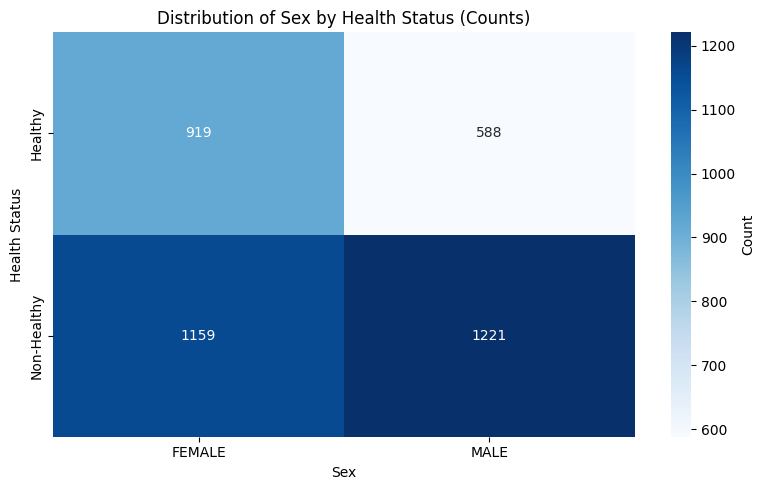

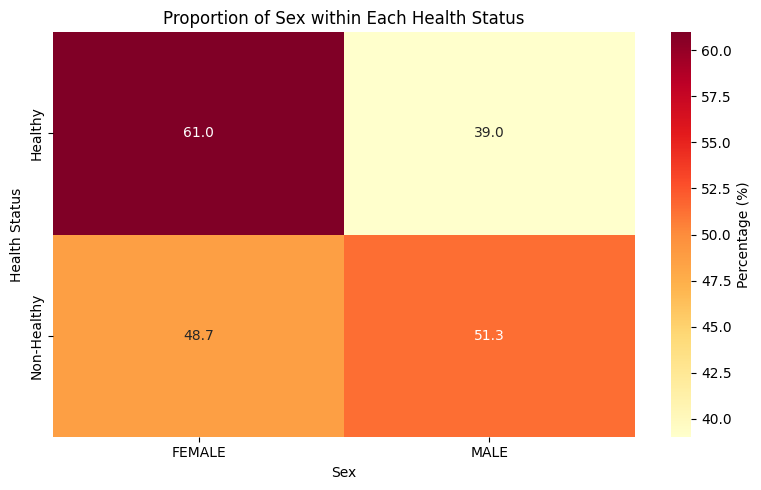

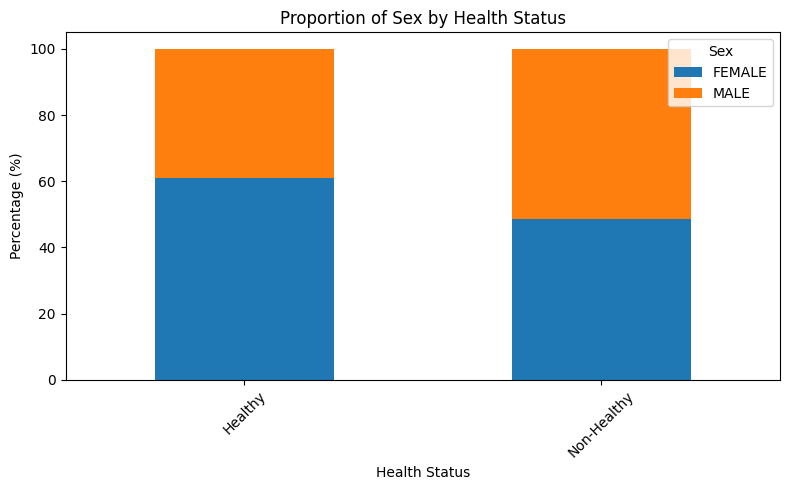

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Assuming your DataFrame is merge_df

# For categorical correlation, use crosstab to show counts or proportions
# Handle any inconsistencies in column names (e.g., 'Health_status' might have variations like 'Non-healthy' vs 'Non-Healthy')
merge_df['Health_status'] = merge_df['Health_status'].str.strip().str.title()  # Normalize e.g., 'Non-healthy' -> 'Non-Healthy'

# Crosstab for counts
ct_counts = pd.crosstab(merge_df['Health_status'], merge_df['Sex'], margins=True)

# Crosstab for row proportions (percentage of each health status by sex)
ct_props = pd.crosstab(merge_df['Health_status'], merge_df['Sex'], normalize='index') * 100

print("Counts by Health Status and Sex:")
print(ct_counts)
print("\nProportions (% of each Health Status by Sex):")
print(ct_props)

# Visualization 1: Heatmap of Counts
plt.figure(figsize=(8, 5))
sns.heatmap(ct_counts.iloc[:-1, :-1], annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Distribution of Sex by Health Status (Counts)')
plt.xlabel('Sex')
plt.ylabel('Health Status')
plt.tight_layout()
plt.show()

# Visualization 2: Heatmap of Proportions
plt.figure(figsize=(8, 5))
sns.heatmap(ct_props, annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label': 'Percentage (%)'})
plt.title('Proportion of Sex within Each Health Status')
plt.xlabel('Sex')
plt.ylabel('Health Status')
plt.tight_layout()
plt.show()

# Visualization 3: Stacked Bar Plot for Proportions
ct_props.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Proportion of Sex by Health Status')
plt.ylabel('Percentage (%)')
plt.xlabel('Health Status')
plt.legend(title='Sex', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Location unique values and counts:
Location
France     919
USA        851
China      680
Italy      670
Germany    622
Austria    304
Turkey      71
India       30
Name: count, dtype: int64

Platform unique values and counts:
Platform
ILLUMINA                        1510
Illumina HiSeq 2000             1283
Illumina HiSeq 4000              851
Illumina HiSeq 4000.             258
Illumina HiSeq 2000 platform     126
Illumina HiSeq 2500              120
Name: count, dtype: int64

Crosstab of Location vs Platform:
Platform  ILLUMINA  Illumina HiSeq 2000  Illumina HiSeq 2000 platform  \
Location                                                                
Austria        304                    0                             0   
China          554                    0                           126   
France           0                  919                             0   
Germany          0                  364                             0   
India           30                    0     

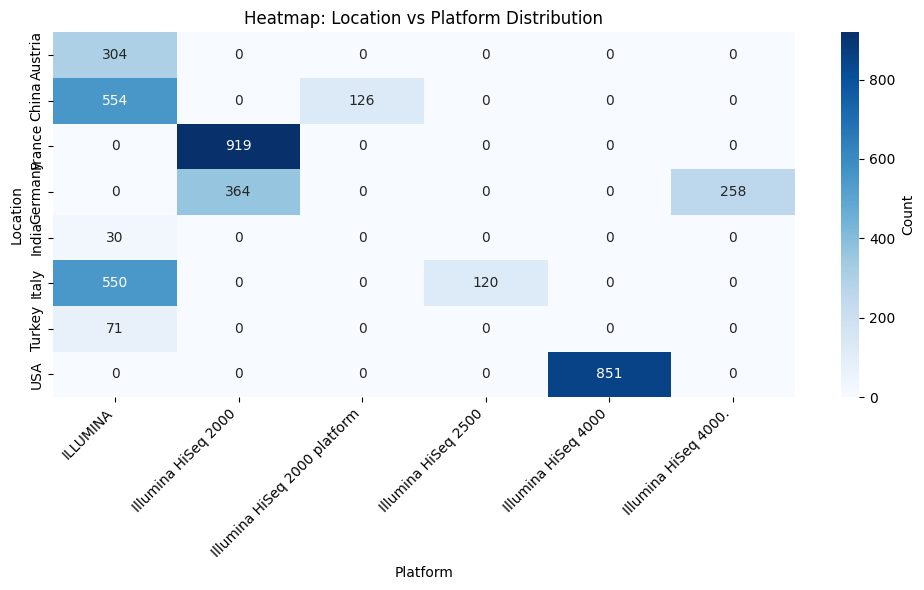

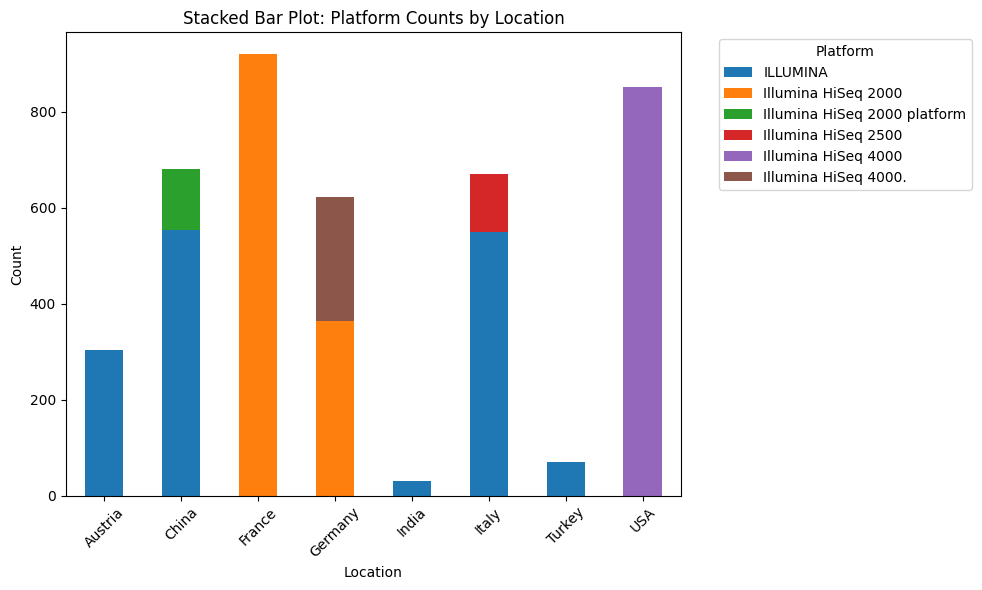

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merge_df is your existing DataFrame (e.g., loaded via pd.read_csv('your_file.csv'))
# Focus on 'Location' and 'Platform' columns

# 1. Basic Comparison: Unique values and counts
print("Location unique values and counts:")
print(merge_df['Location'].value_counts())
print("\nPlatform unique values and counts:")
print(merge_df['Platform'].value_counts())

# 2. Crosstab for distribution
crosstab = pd.crosstab(merge_df['Location'], merge_df['Platform'])
print("\nCrosstab of Location vs Platform:")
print(crosstab)

# 3. Per-location platform breakdown
for loc in merge_df['Location'].unique():
    plat_dist = merge_df[merge_df['Location'] == loc]['Platform'].value_counts(normalize=True) * 100
    print(f"\nPlatform distribution for {loc} (%):")
    print(plat_dist)

# 4. Visualization: Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Heatmap: Location vs Platform Distribution')
plt.xlabel('Platform')
plt.ylabel('Location')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Alternative: Stacked Bar Plot
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Plot: Platform Counts by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: Save figures
# crosstab.to_csv('location_platform_crosstab.csv')  # Export table
plt.savefig('location_platform_viz.png')  # Save plot

Unique BioProjects:
15
BioProject
PRJEB6070       1283
PRJNA1237248     851
PRJEB7774        305
PRJEB27928       258
PRJEB72524       203
PRJNA763023      200
PRJNA429097      191
PRJNA731589      163
PRJEB72523       163
PRJEB10878       126
Name: count, dtype: int64

Class label summary:
count    4148.000000
mean        0.392478
std         0.488361
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: class_label, dtype: float64


/tmp/ipython-input-2654355494.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ml_df_top, x='BioProject', y='class_label', palette='Set2')


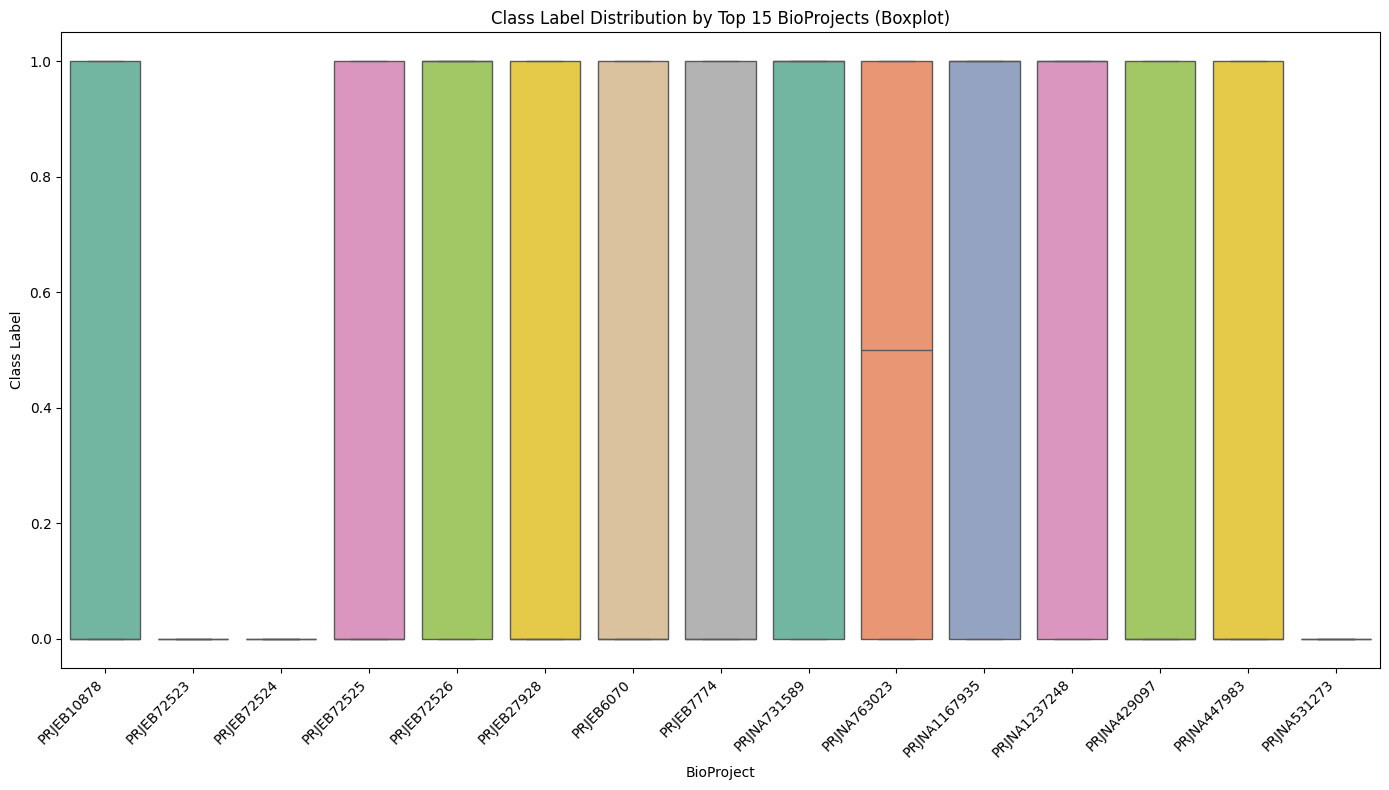

/tmp/ipython-input-2654355494.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=ml_df_top, x='BioProject', y='class_label', palette='Set3')


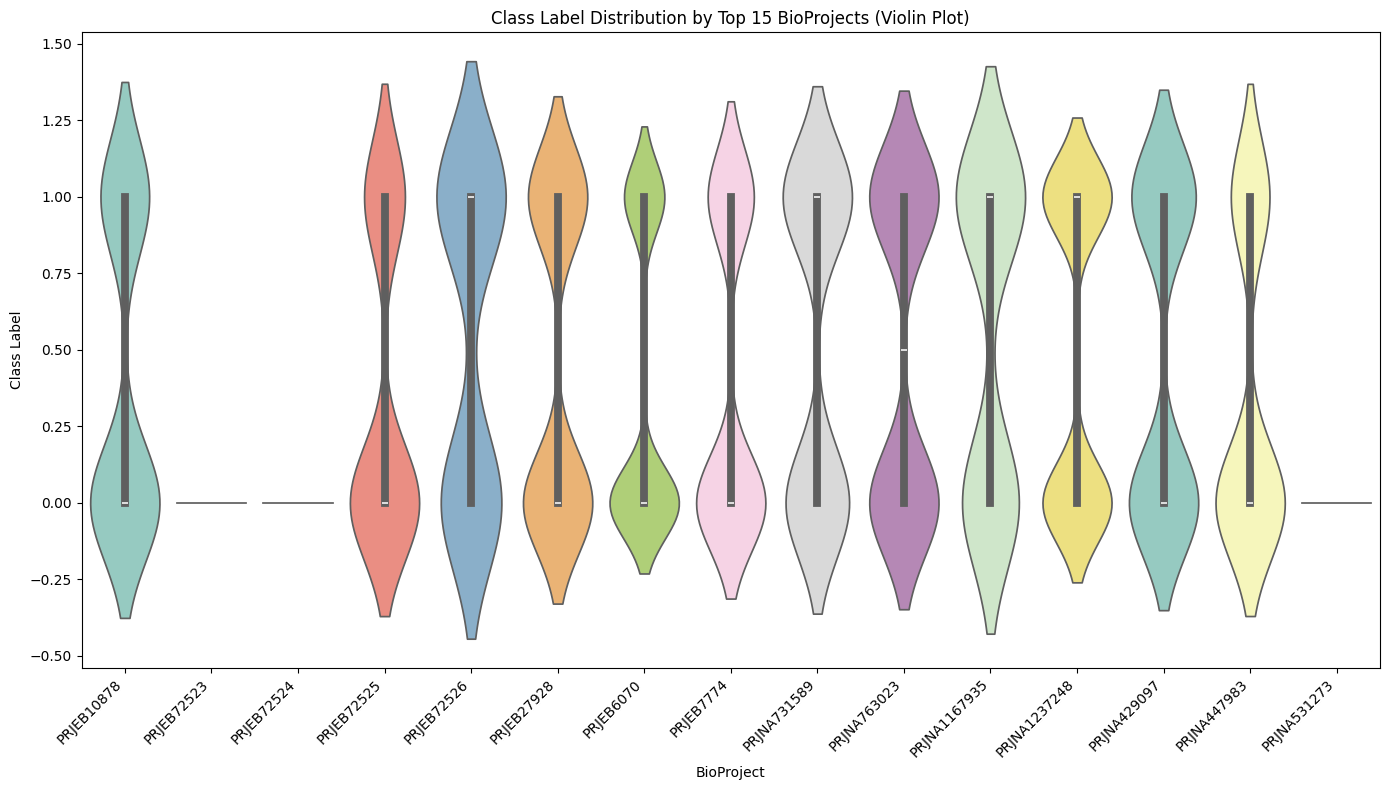

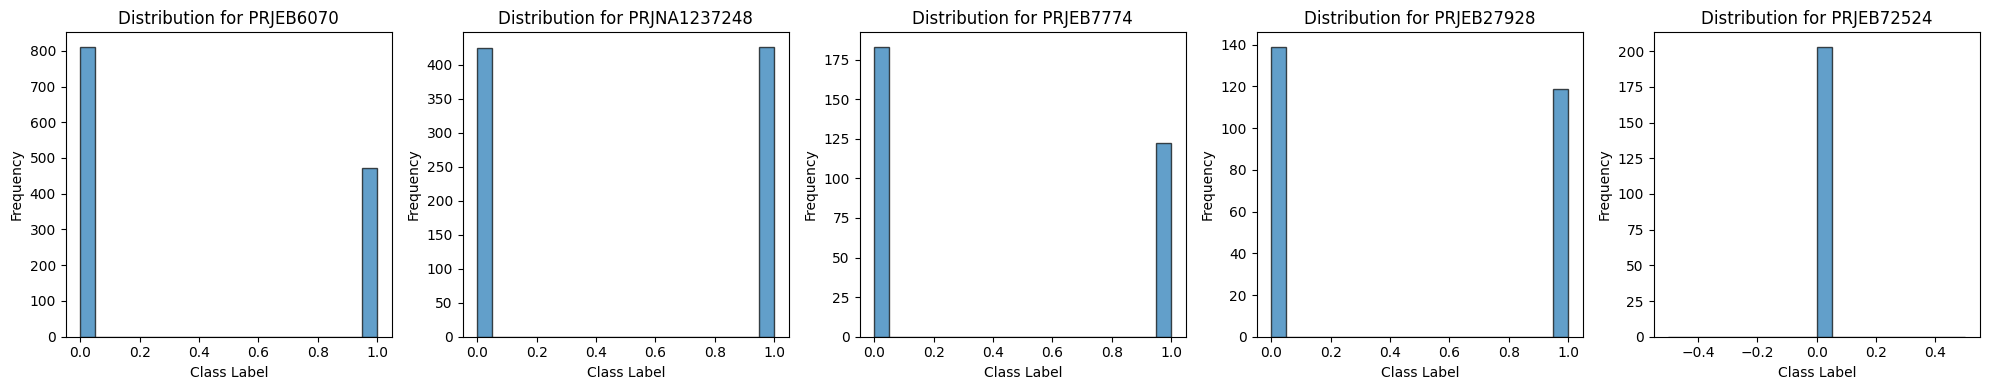

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'ml_df' with columns 'BioProject' and 'class_label'

# First, let's inspect the unique BioProjects and basic stats
print("Unique BioProjects:")
print(ml_df['BioProject'].nunique())
print(ml_df['BioProject'].value_counts().head(10))  # Top 10 most frequent

print("\nClass label summary:")
print(ml_df['class_label'].describe())

# Visualization 1: Boxplot of class_label distribution by BioProject
# This shows median, quartiles, and outliers for each project.
# If there are too many unique projects, consider filtering to top N.
top_projects = ml_df['BioProject'].value_counts().head(15).index  # Limit to top 15 for readability
ml_df_top = ml_df[ml_df['BioProject'].isin(top_projects)]

plt.figure(figsize=(14, 8))
sns.boxplot(data=ml_df_top, x='BioProject', y='class_label', palette='Set2')
plt.title('Class Label Distribution by Top 15 BioProjects (Boxplot)')
plt.xlabel('BioProject')
plt.ylabel('Class Label')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualization 2: Violin plot for density distribution (alternative to boxplot)
plt.figure(figsize=(14, 8))
sns.violinplot(data=ml_df_top, x='BioProject', y='class_label', palette='Set3')
plt.title('Class Label Distribution by Top 15 BioProjects (Violin Plot)')
plt.xlabel('BioProject')
plt.ylabel('Class Label')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# If you want histograms for all projects side-by-side (subplots), limit to fewer projects
# Example for top 5:
top5_projects = ml_df['BioProject'].value_counts().head(5).index
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, project in enumerate(top5_projects):
    ml_df_proj = ml_df[ml_df['BioProject'] == project]
    axes[i].hist(ml_df_proj['class_label'], bins=20, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Distribution for {project}')
    axes[i].set_xlabel('Class Label')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

# To save plots instead of showing:
# plt.savefig('class_label_distribution.png', dpi=300, bbox_inches='tight')

In [ ]:
import pandas as pd

# Assuming 'ml_df' is your DataFrame with 'BioProject' and 'class_label' columns
# If class_label has exactly two types (e.g., 0 and 1, or 'positive' and 'negative'), this will show counts for each

# First, check unique values in class_label to confirm the two types
print("Unique values in class_label:")
print(ml_df['class_label'].unique())
print("\nValue counts overall:")
print(ml_df['class_label'].value_counts())

# To see counts for each unique BioProject
counts_per_project = ml_df.groupby(['BioProject', 'class_label']).size().unstack(fill_value=0)
print("\nCounts of class_label types per BioProject:")
print(counts_per_project)

# If you want for a particular BioProject, replace 'YOUR_PROJECT_HERE' with the actual name, e.g., 'PRJEB108780'
particular_project = 'PRJEB10878'  # Change this to your specific BioProject (using an existing one for demonstration)
project_counts = ml_df[ml_df['BioProject'] == particular_project]['class_label'].value_counts()
print(f"\nCounts for particular BioProject '{particular_project}':")
print(project_counts)

# If class_label is continuous (not categorical), you might want to bin it into two types, e.g., positive/negative
if ml_df['class_label'].dtype in ['float64', 'int64']:
    ml_df['class_type'] = ml_df['class_label'].apply(lambda x: 'positive' if x >= 0 else 'negative')
    print("\nCounts of binned class types (positive/negative) per BioProject:")
    binned_counts = ml_df.groupby(['BioProject', 'class_type']).size().unstack(fill_value=0)
    print(binned_counts)

    # For particular project
    particular_binned = ml_df[ml_df['BioProject'] == particular_project]['class_type'].value_counts()
    print(f"\nBinned counts for '{particular_project}':")
    print(particular_binned)

Unique values in class_label:
[0 1]

Value counts overall:
class_label
0    2520
1    1628
Name: count, dtype: int64

Counts of class_label types per BioProject:
class_label     0    1
BioProject            
PRJEB10878     74   52
PRJEB27928    139  119
PRJEB6070     811  472
PRJEB72523    163    0
PRJEB72524    203    0
PRJEB72525     78   46
PRJEB72526     28   32
PRJEB7774     183  122
PRJNA1167935   32   39
PRJNA1237248  425  426
PRJNA429097    99   92
PRJNA447983    77   43
PRJNA531273    30    0
PRJNA731589    78   85
PRJNA763023   100  100

Counts for particular BioProject 'PRJEB10878':
class_label
0    74
1    52
Name: count, dtype: int64

Counts of binned class types (positive/negative) per BioProject:
class_type    positive
BioProject            
PRJEB10878         126
PRJEB27928         258
PRJEB6070         1283
PRJEB72523         163
PRJEB72524         203
PRJEB72525         124
PRJEB72526          60
PRJEB7774          305
PRJNA1167935        71
PRJNA1237248       851
PRJ

Unique values in class_label:
['PRJEB10878' 'PRJEB72523' 'PRJEB72524' 'PRJEB72525' 'PRJEB72526'
 'PRJEB27928' 'PRJEB6070' 'PRJEB7774' 'PRJNA731589' 'PRJNA763023'
 'PRJNA1167935' 'PRJNA1237248' 'PRJNA429097' 'PRJNA447983' 'PRJNA531273']
[0 1]

Value counts overall:
class_label
0    2520
1    1628
Name: count, dtype: int64

Counts of class_label types per BioProject:
class_label     0    1
BioProject            
PRJEB10878     74   52
PRJEB27928    139  119
PRJEB6070     811  472
PRJEB72523    163    0
PRJEB72524    203    0
PRJEB72525     78   46
PRJEB72526     28   32
PRJEB7774     183  122
PRJNA1167935   32   39
PRJNA1237248  425  426
PRJNA429097    99   92
PRJNA447983    77   43
PRJNA531273    30    0
PRJNA731589    78   85
PRJNA763023   100  100

Counts for particular BioProject 'PRJEB10878':
class_label
0    74
1    52
Name: count, dtype: int64

Counts of binned class types (positive/negative) per BioProject:
class_type    positive
BioProject            
PRJEB10878         126
PRJE

<Figure size 1200x600 with 0 Axes>

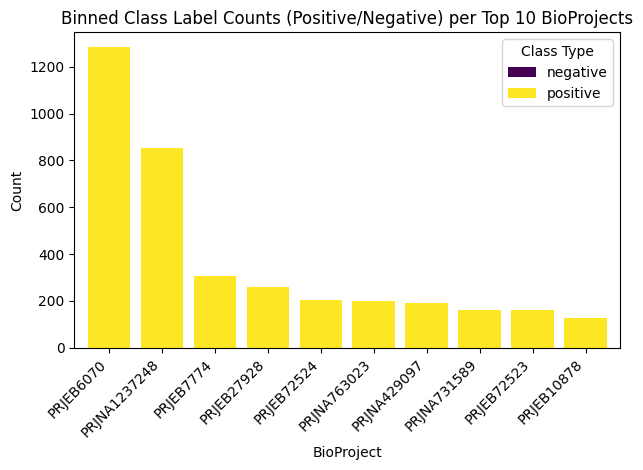

<Figure size 1200x600 with 0 Axes>

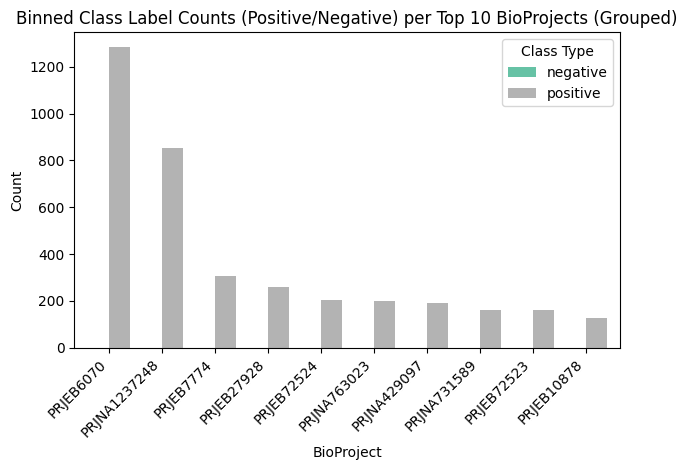

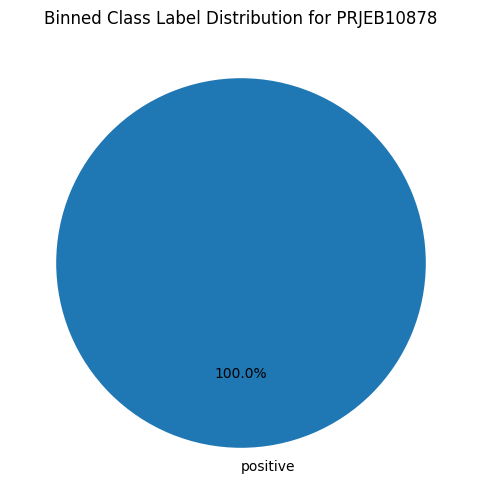

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'ml_df' is your DataFrame with 'BioProject' and 'class_label' columns
# Note: Using 'BioProject' to match your original data description (case-sensitive)

# First, check unique values in class_label to confirm the two types
print("Unique values in class_label:")
print(ml_df['BioProject'].unique())  # Fixed: was 'Bioproject'
print(ml_df['class_label'].unique())
print("\nValue counts overall:")
print(ml_df['class_label'].value_counts())

# To see counts for each unique BioProject
counts_per_project = ml_df.groupby(['BioProject', 'class_label']).size().unstack(fill_value=0)
print("\nCounts of class_label types per BioProject:")
print(counts_per_project)

# If you want for a particular BioProject, replace 'YOUR_PROJECT_HERE' with the actual name, e.g., 'PRJEB108780'
particular_project = 'PRJEB10878'  # Using an existing project as an example from your data, as 'PRJEB108780' does not exist
project_counts = ml_df[ml_df['BioProject'] == particular_project]['class_label'].value_counts()
print(f"\nCounts for particular BioProject '{particular_project}':")
print(project_counts)

# If class_label is continuous (not categorical), you might want to bin it into two types, e.g., positive/negative
if ml_df['class_label'].dtype in ['float64', 'int64']:
    ml_df['class_type'] = ml_df['class_label'].apply(lambda x: 'positive' if x >= 0 else 'negative')
    print("\nCounts of binned class types (positive/negative) per BioProject:")
    binned_counts = ml_df.groupby(['BioProject', 'class_type']).size().unstack(fill_value=0)
    print(binned_counts)

    # For particular project
    particular_binned = ml_df[ml_df['BioProject'] == particular_project]['class_type'].value_counts()
    print(f"\nBinned counts for '{particular_project}':")
    print(particular_binned)

    # Visualization: Stacked bar plot for binned class types across all (or top N) BioProjects
    # Limit to top 10 projects for readability
    top_projects = binned_counts.sum(axis=1).sort_values(ascending=False).head(10).index
    binned_top = binned_counts.loc[top_projects].reindex(columns=['negative', 'positive'])  # Order columns consistently

    plt.figure(figsize=(12, 6))
    binned_top.plot(kind='bar', stacked=True, colormap='viridis', width=0.8)
    plt.title('Binned Class Label Counts (Positive/Negative) per Top 10 BioProjects')
    plt.xlabel('BioProject')
    plt.ylabel('Count')
    plt.legend(title='Class Type', loc='upper right')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Alternative: Grouped bar plot for better comparison
    plt.figure(figsize=(12, 6))
    binned_top.plot(kind='bar', width=0.8, colormap='Set2')
    plt.title('Binned Class Label Counts (Positive/Negative) per Top 10 BioProjects (Grouped)')
    plt.xlabel('BioProject')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Class Type')
    plt.tight_layout()
    plt.show()

    # For a particular project: Pie chart example
    plt.figure(figsize=(8, 6))
    particular_binned.plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f"Binned Class Label Distribution for {particular_project}")
    plt.ylabel('')  # Remove y-label for pie
    plt.show()

<Figure size 1200x800 with 0 Axes>

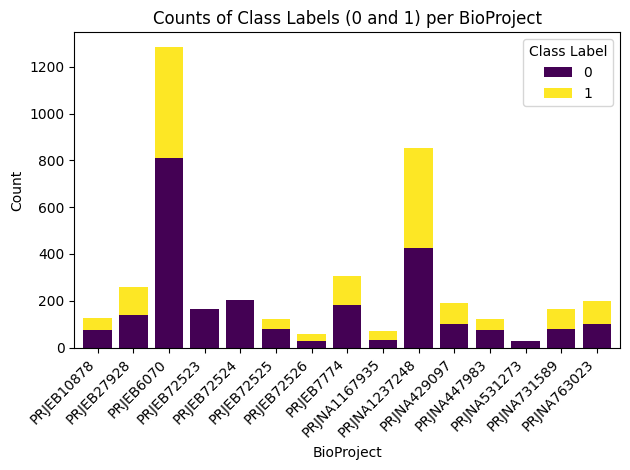

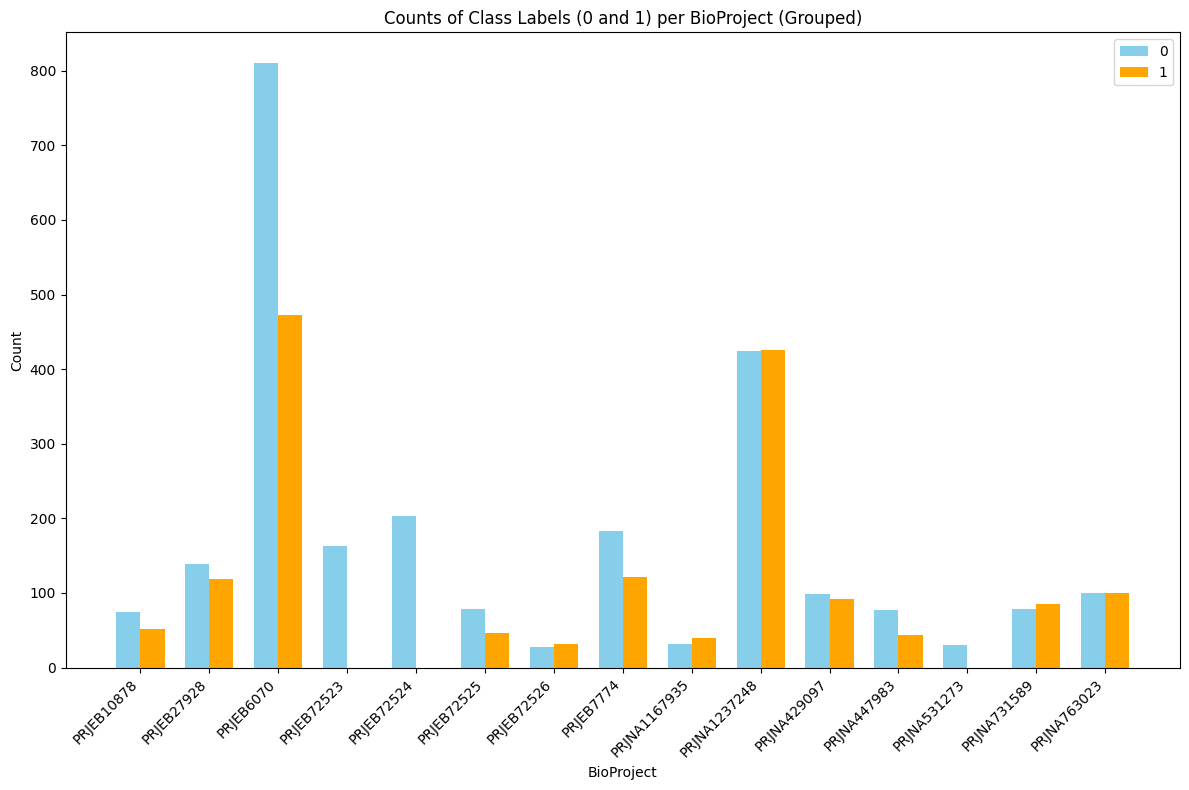

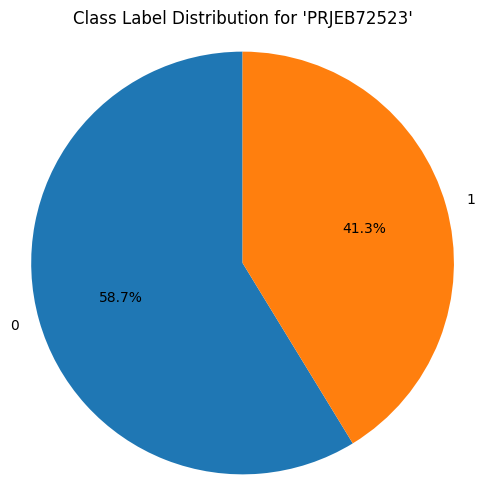

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hardcoded data from the provided output
data = {
    'BioProject': [
        'PRJEB10878', 'PRJEB27928', 'PRJEB6070', 'PRJEB72523', 'PRJEB72524',
        'PRJEB72525', 'PRJEB72526', 'PRJEB7774', 'PRJNA1167935', 'PRJNA1237248',
        'PRJNA429097', 'PRJNA447983', 'PRJNA531273', 'PRJNA731589', 'PRJNA763023'
    ],
    '0': [74, 139, 811, 163, 203, 78, 28, 183, 32, 425, 99, 77, 30, 78, 100],
    '1': [52, 119, 472, 0, 0, 46, 32, 122, 39, 426, 92, 43, 0, 85, 100]
}

df_counts = pd.DataFrame(data)
df_counts = df_counts.set_index('BioProject')

# Stacked bar plot
plt.figure(figsize=(12, 8))
df_counts.plot(kind='bar', stacked=True, colormap='viridis', width=0.8)
plt.title('Counts of Class Labels (0 and 1) per BioProject')
plt.xlabel('BioProject')
plt.ylabel('Count')
plt.legend(title='Class Label', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Alternative: Grouped bar plot
fig, ax = plt.subplots(figsize=(12, 8))
width = 0.35
x = range(len(df_counts))
ax.bar([i - width/2 for i in x], df_counts['0'], width, label='0', color='skyblue')
ax.bar([i + width/2 for i in x], df_counts['1'], width, label='1', color='orange')

ax.set_xlabel('BioProject')
ax.set_ylabel('Count')
ax.set_title('Counts of Class Labels (0 and 1) per BioProject (Grouped)')
ax.set_xticks(x)
ax.set_xticklabels(df_counts.index, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

# For the particular BioProject 'PRJEB10878' - Pie chart
particular_data = {'0': 74, '1': 52}
plt.figure(figsize=(6, 6))
plt.pie(particular_data.values(), labels=particular_data.keys(), autopct='%1.1f%%', startangle=90)
plt.title("Class Label Distribution for 'PRJEB72523'")
plt.axis('equal')
plt.show()